<a href="https://colab.research.google.com/github/dipta13/Python/blob/main/Tugas%20Python%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [110]:
ls

dataset@  Untitled0.ipynb  Untitled2.ipynb
daun/     Untitled1.ipynb  Untitled3.ipynb


In [111]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [112]:
print("[INFO] loading images...")
imagePaths = paths.list_images("daun")
data = []
labels = []

[INFO] loading images...


In [113]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 
  # preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [114]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [115]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [116]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [117]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.35, shuffle=True)
print(trainX.shape)
print(testX.shape)

(379, 128, 128, 3)
(205, 128, 128, 3)


In [118]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(16, (5,5), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               2691300   
_________________________________________________________________
dense_13 (Dense)             (None, 5)                

In [128]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
12/12 [==============================] - 7s 613ms/step - loss: 0.1914 - accuracy: 0.9446 - val_loss: 1.4515 - val_accuracy: 0.6976
Epoch 2/100
12/12 [==============================] - 7s 605ms/step - loss: 0.0239 - accuracy: 0.9894 - val_loss: 1.1514 - val_accuracy: 0.7512
Epoch 3/100
12/12 [==============================] - 7s 607ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.3141 - val_accuracy: 0.7317
Epoch 4/100
12/12 [==============================] - 7s 604ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.3183 - val_accuracy: 0.7854
Epoch 5/100
12/12 [==============================] - 7s 605ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.3248 - val_accuracy: 0.7707
Epoch 6/100
12/12 [==============================] - 7s 606ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.3708 - val_accuracy: 0.7805
Epoch 7/100
12/12 [==============================] - 7s 614ms/step - loss: 8.3670e-04 - accuracy: 1.0000 - val_loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


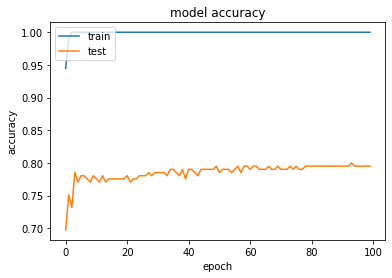

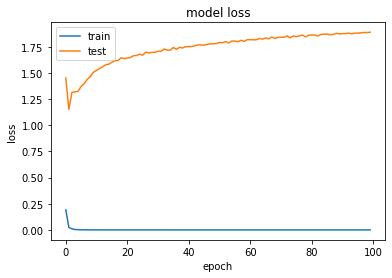

In [130]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.80      0.70      0.75        47
      GMB_02       0.69      0.69      0.69        42
      GMB_03       0.89      0.87      0.88        39
      GMB_04       0.79      0.87      0.83        39
      GMB_05       0.80      0.87      0.84        38

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.79       205



In [132]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [134]:
import cv2
import matplotlib.pyplot as plt
image1='daun/GMB_01/IMG_20200814_132017_HDR.jpg'

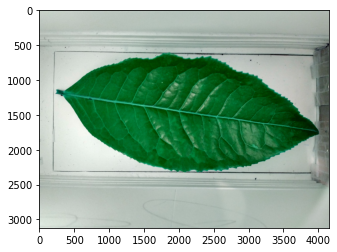

In [135]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [137]:
image_testing = Image.open('dataset/GMB_01/IMG_20200814_132017_HDR.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [138]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [139]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.8112971e-01 1.3065129e-13 1.7995008e-11 1.8870279e-02 7.9631593e-14]]
['GMB_01']
